In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2019-12-31'
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.386731,462229600
1,2010-01-12,7.471071,7.491786,7.372143,7.418571,6.314083,594459600
2,2010-01-13,7.423929,7.533214,7.289286,7.523214,6.403146,605892000
3,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.366062,432894000
4,2010-01-15,7.533214,7.557143,7.352500,7.354643,6.259671,594067600
...,...,...,...,...,...,...,...
2505,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451065,98572000
2506,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517082,48478800
2507,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896347,93121200
2508,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000


In [3]:
df = df.reset_index()
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.386731,462229600
1,1,2010-01-12,7.471071,7.491786,7.372143,7.418571,6.314083,594459600
2,2,2010-01-13,7.423929,7.533214,7.289286,7.523214,6.403146,605892000
3,3,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.366062,432894000
4,4,2010-01-15,7.533214,7.557143,7.352500,7.354643,6.259671,594067600
...,...,...,...,...,...,...,...,...
2505,2505,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451065,98572000
2506,2506,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517082,48478800
2507,2507,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896347,93121200
2508,2508,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000


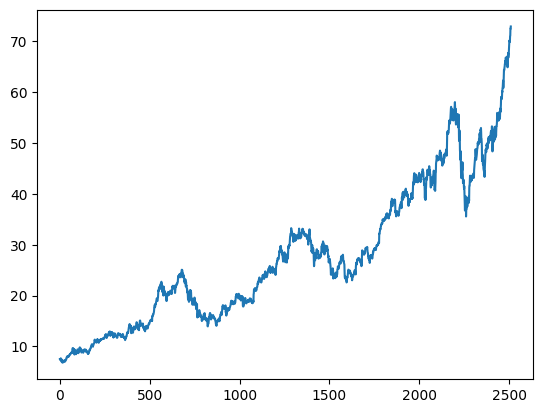

In [11]:
plt.plot(df.Close)

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2505    59.201075
2506    59.401700
2507    59.643125
2508    59.875125
2509    60.106325
Name: Close, Length: 2510, dtype: float64

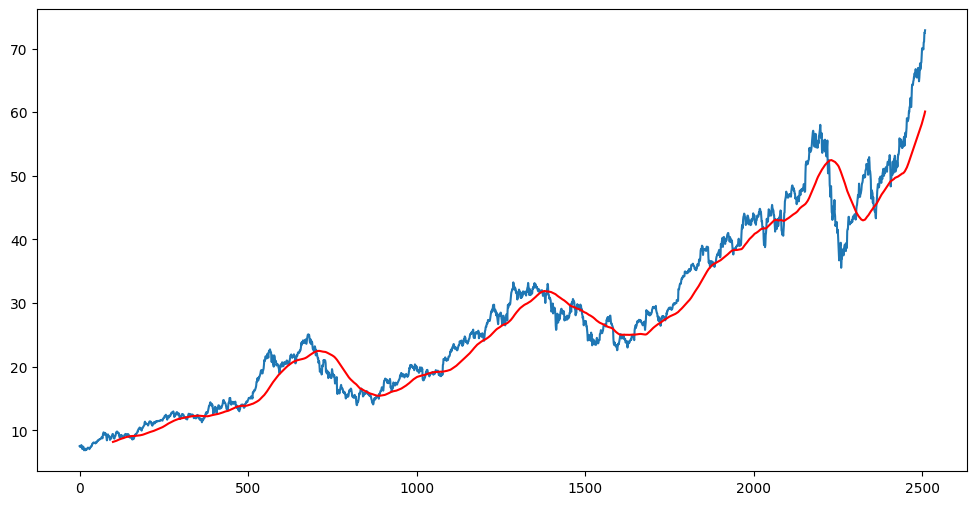

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2505    54.132313
2506    54.261513
2507    54.396763
2508    54.529350
2509    54.661100
Name: Close, Length: 2510, dtype: float64

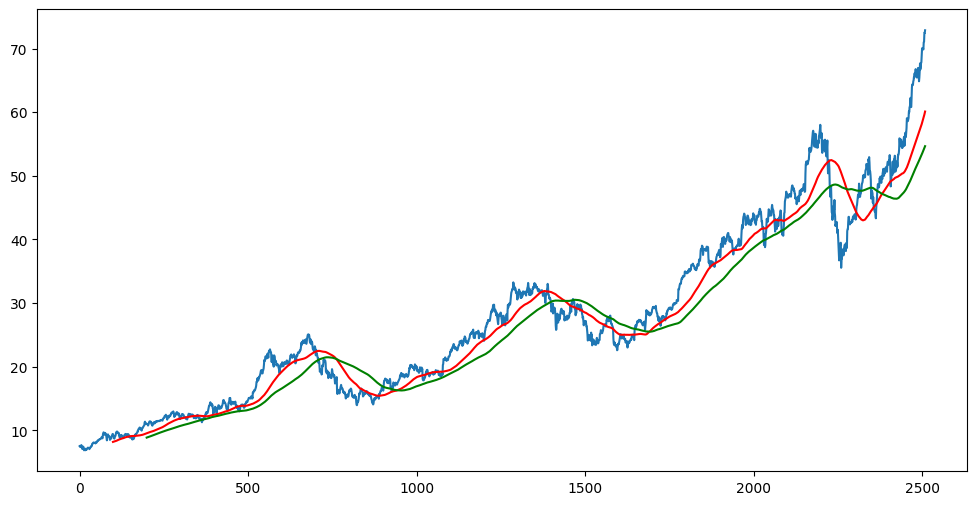

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(2510, 6)

In [34]:
import pandas as pd

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1757, 1)
(753, 1)


In [35]:
data_training.head()

,Close
0,7.503929
1,7.418571
2,7.523214
3,7.479643
4,7.354643


In [36]:
data_testing.head()

,Close
1757,29.037500
1758,29.004999
1759,29.152500
1760,29.477501
1761,29.747499


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02444008],
       [0.02120573],
       [0.02517082],
       ...,
       [0.84616013],
       [0.84587594],
       [0.83725556]])

In [42]:
data_training_array.shape

(1757, 1)

In [71]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


    x_train

  
  



In [72]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
x_train.shape

(1657, 100, 1)

In [56]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [74]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [81]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f3e4b510d00>>

In [82]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 22s 298ms/step - loss: 0.1132
Epoch 2/50
52/52 [==============================] - 15s 292ms/step - loss: 0.0741
Epoch 3/50
52/52 [==============================] - 17s 329ms/step - loss: 0.0715
Epoch 4/50
52/52 [==============================] - 15s 298ms/step - loss: 0.0705
Epoch 5/50
52/52 [==============================] - 16s 303ms/step - loss: 0.0694
Epoch 6/50
52/52 [==============================] - 17s 317ms/step - loss: 0.0690
Epoch 7/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0689
Epoch 8/50
52/52 [==============================] - 15s 298ms/step - loss: 0.0680
Epoch 9/50
52/52 [==============================] - 15s 294ms/step - loss: 0.0676
Epoch 10/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0671
Epoch 11/50
52/52 [==============================] - 15s 295ms/step - loss: 0.0666
Epoch 12/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0668
Epoch 13/50
5

In [83]:
model.save('keras_model.h5')

In [84]:
data_testing.head()

,Close
1757,29.037500
1758,29.004999
1759,29.152500
1760,29.477501
1761,29.747499


In [85]:
data_training.tail(100)

,Close
1657,27.000000
1658,26.982500
1659,27.045000
1660,27.370001
1661,27.344999
...,...
1752,29.129999
1753,29.315001
1754,29.190001
1755,29.182501


In [86]:
past_100_days = data_training.tail(100)

In [87]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-87-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [88]:
final_df.head()

,Close
0,27.000000
1,26.982500
2,27.045000
3,27.370001
4,27.344999


In [89]:
input_data = scaler.fit_transform(final_df)

In [90]:
input_data.shape

(853, 1)

In [94]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [95]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(753, 100, 1)
(753,)


In [97]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 5s 198ms/step


In [98]:
y_predicted.shape

(753, 100, 1)

In [99]:
y_test

array([0.06911197, 0.06842189, 0.07155372, 0.07845432, 0.08418706,
       0.08482406, 0.08822127, 0.0855672 , 0.08445249, 0.0895483 ,
       0.0894952 , 0.08838051, 0.0895483 , 0.08997295, 0.08938906,
       0.09952758, 0.09984611, 0.09989915, 0.09820055, 0.09671429,
       0.13599451, 0.13482672, 0.13774619, 0.144169  , 0.15075113,
       0.15345824, 0.15547537, 0.15388291, 0.16009341, 0.16927655,
       0.1718775 , 0.17102826, 0.17299223, 0.17819418, 0.18037054,
       0.17729182, 0.1779819 , 0.17941503, 0.17973358, 0.1945963 ,
       0.19019063, 0.19454326, 0.19220766, 0.19316317, 0.19040292,
       0.18870427, 0.19114606, 0.19146452, 0.19034986, 0.19815284,
       0.19937369, 0.19565799, 0.20346098, 0.19486173, 0.20324861,
       0.20059454, 0.19910826, 0.20038224, 0.215882  , 0.21758056,
       0.21657199, 0.21513886, 0.21535114, 0.22103089, 0.21704979,
       0.21513886, 0.21344021, 0.21253785, 0.20436334, 0.20526572,
       0.20128462, 0.20542495, 0.2020808 , 0.19932055, 0.20866

In [100]:
scaler.scale_

array([0.02123255])

In [101]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


ValueError: ignored

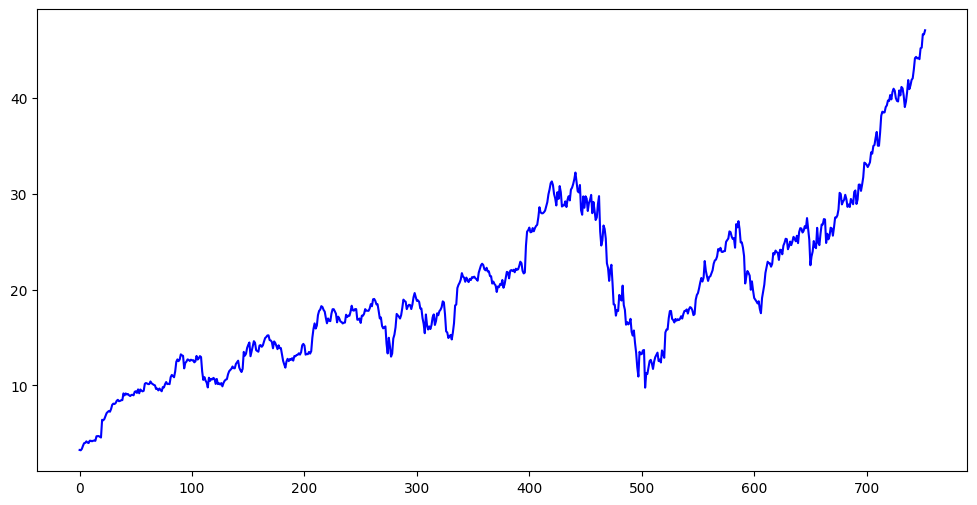

In [103]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()